## For Assignment 2 you should design your own investigation into the citibike data.

Come up with a question about the Citibike data usage. It can be anything that involves Categorical data.

Choose the significance threshold

Clearly state they Null and Alternate hypothesis

Wrangle the data so that it is ready for your analysis

In [9]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import seaborn
import os

%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

import os
import json

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2017


In [10]:
os.getenv('PUIDATA')

'/home/cusp/cm4698/PUIdata'

In [11]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [12]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [22]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime.

# Question: Do women ride proportionally less often as night?

# Null Hypothesis: Ratio of women riding at midnight to total female ridership is greater than or equal to the same ratio for males

# Alternative Hypothesis: Ratio of women riding at midnight to total female ridership is less than 
# ratio of men riding at night to total male ridership

# Confidence Level: 0.05

In [23]:
df['hour'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00,0
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00,0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00,0
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00,0


In [24]:
df2 = df[['hour', 'gender']]
df2.head()

,hour,gender
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1


In [28]:
w_total = df2.hour.groupby([df.gender == 2]).count()
m_total = df2.hour.groupby([df.gender == 1]).count()

w_total = w_total[True]
m_total = m_total[True]

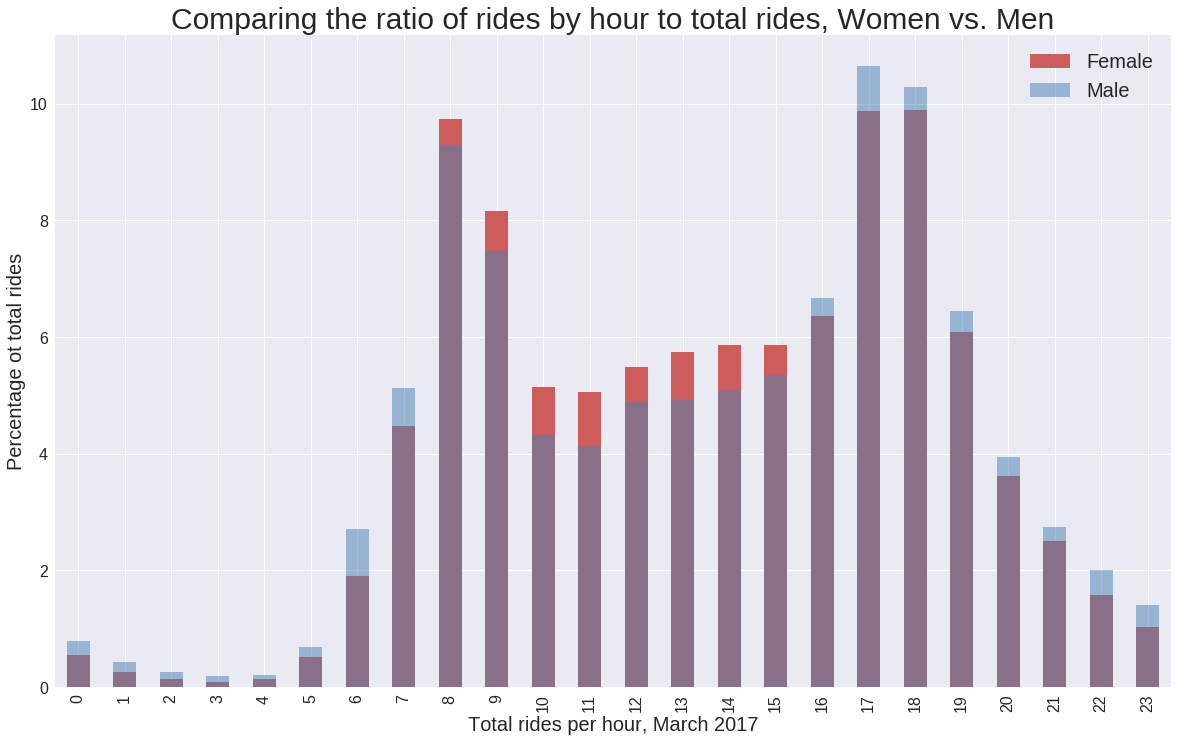

In [32]:
fig = pl.figure(figsize(20,12))

(((df2['hour'][df2['gender'] == 2].groupby([df2['hour']]).count()) / w_total) * 100)\
.plot(kind="bar", color='IndianRed', label='Female')
ax = (((df2['hour'][df2['gender'] == 1].groupby([df2['hour']]).count()) / m_total) * 100)\
.plot(kind="bar", color="SteelBlue", alpha=0.5, label="Male", fontsize=16)

pl.xlabel('Total rides per hour, March 2017', fontsize=20)
pl.ylabel('Percentage ot total rides', fontsize=20)
pl.title('Comparing the ratio of rides by hour to total rides, Women vs. Men', fontsize=30)
pl.legend(prop={'size': 20})